In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [12]:
#Reading the Dataset.
dataset= pd.read_csv('Credit_Card_Applications.csv')

In [13]:
#Dividing the Dataset into features and class.
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [19]:
#Feature Scaling
sc=MinMaxScaler(feature_range=(0,1))

In [20]:
X=sc.fit_transform(X)

In [26]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=21e21def0093f7c425920820b1e1f82f0bdbc775a3a21913ca758963f4e5a7a9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built MiniSom



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
#Traning the SOM
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [38]:
#Randomly assign the vectors as Zero.
som.random_weights_init(X)

In [39]:
#Train the method on X[Repeat steps.]
som.train_random(data=X,num_iteration=100)

In [40]:
#Visualize the results [2D Grid].
from pylab import bone,pcolor,colorbar,plot,show

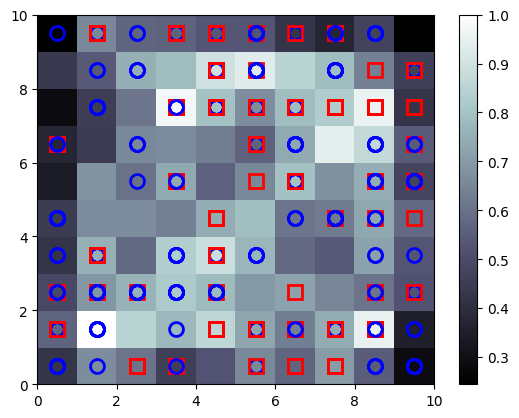

In [51]:
bone()
#Transpose of all the MID Distances of all winning nodes
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['b','r']
#Approval->blue circle and not approved->red square
#Include markers and Colors.
for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
        w[1]+0.5,
        markers[Y[i]],
        markeredgecolor=colors[Y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2
        )
show()

In [53]:
mappings=som.win_map(X)

In [55]:
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)

In [58]:
frauds = sc.inverse_transform(frauds)

In [60]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
3937558637170
3936207603280
3949489689874
3942847397932
3904264766890
3946001475202
3889244566456
3907598898769
3912939103705
3923878232821
